<a href="https://colab.research.google.com/github/spentaur/DS-Unit-2-Regression-Classification/blob/master/module1/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

df["interest_level_code"] = lb_make.fit_transform(df["interest_level"])

df.dropna(subset=['description'], inplace=True)
df = df[(df['bathrooms'] > 0) & (df['bedrooms'] > 0) & 
        (df['description']).str.strip() & (df['price'] < 100000) & ~df['description'].str.contains('commercial', case=False)]

In [0]:
df.shape

(37072, 35)

In [0]:
X = df.drop('price',axis=1)

In [0]:
X

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,interest_level_code
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2.0,1,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,40.7427,-73.9957,155 West 21st Street,low,1,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
8,1.0,1,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,40.8234,-73.9457,63 Hamilton Terrace,medium,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
9,2.0,4,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,40.7278,-73.9808,522 E 11th,low,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1.0,1,2016-06-03 03:21:22,Check out this one bedroom apartment in a grea...,W. 173rd Street,40.8448,-73.9396,644 W. 173rd Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,1.0,2,2016-04-19 05:37:25,***LOW FEE. Beautiful CHERRY OAK WOODEN FLOORS...,E 38th St,40.7488,-73.9770,137 E 38th St,high,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
target = df['price']

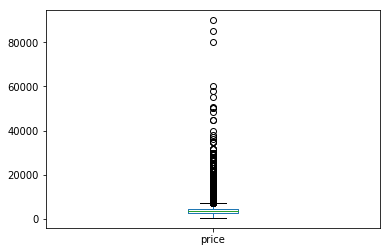

In [0]:
target.plot(kind="box");

In [0]:
location = X[['latitude', 'longitude']]

In [0]:
location = location[(location['longitude'] > -74.03) & (location['longitude'] < -73.8) & (location['latitude'] > 40.5) & (location['latitude'] < 40.9)]

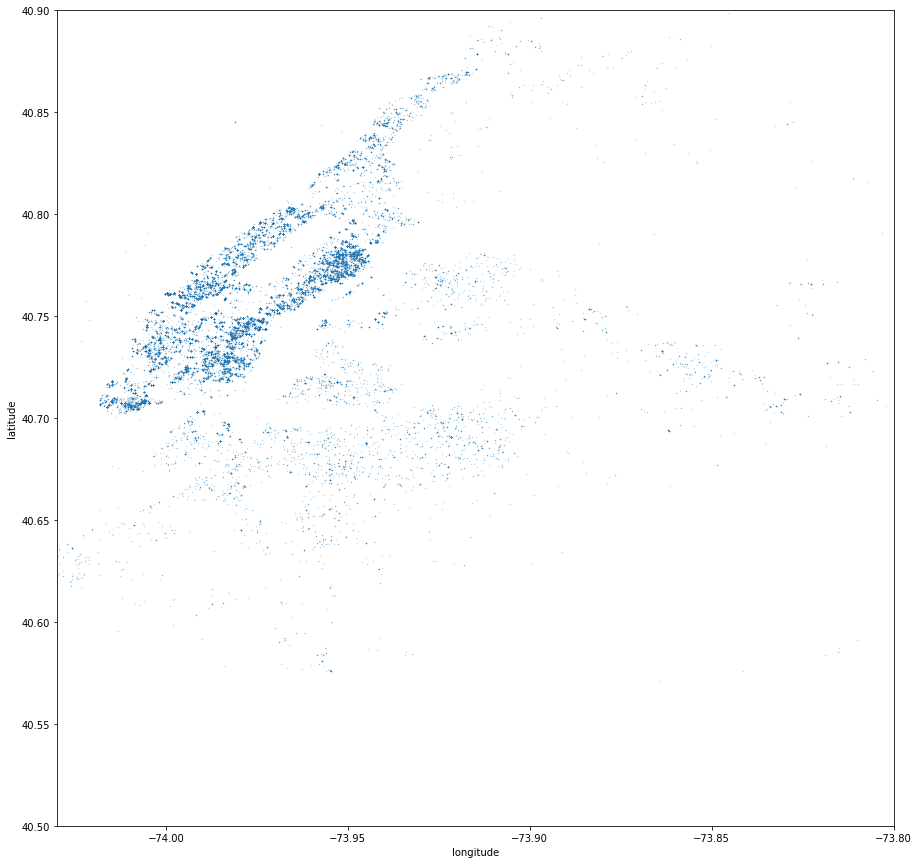

In [0]:
import matplotlib.pyplot as plt
fig = location.plot(kind="scatter", x="longitude", y="latitude", s=.1, alpha=0.4,figsize=(15, 15))
plt.xlim(-74.03, -73.8)
plt.ylim(40.5, 40.9)
plt.show()

In [5]:
import plotly.express as px

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(location, lat="latitude", lon="longitude",
                        size_max=15, zoom=10)

fig.show()

ModuleNotFoundError: ignored

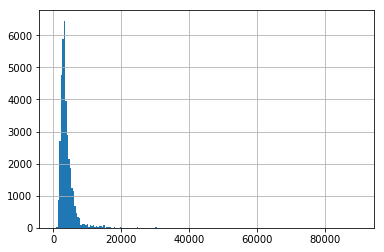

In [0]:
target.hist(bins=200)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [0]:
y = df['price']
X = df._get_numeric_data().drop('price', axis=1)

In [0]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
model.score(X,y)

0.5102366938720571

In [0]:
X = df[['bedrooms', 'bathrooms', 'pre-war', '']]

In [0]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.score(X,y)

0.47177428577219127